<a href="https://colab.research.google.com/github/djhsgfjk/collab/blob/main/Lab_6_%D0%9B%D0%BE%D0%BA%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B0_%D0%BF%D0%BE_%D0%BA%D0%BB%D1%8E%D1%87%D0%B5%D0%B2%D1%8B%D0%BC_%D1%82%D0%BE%D1%87%D0%BA%D0%B0%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from PIL import Image
from pylab import *

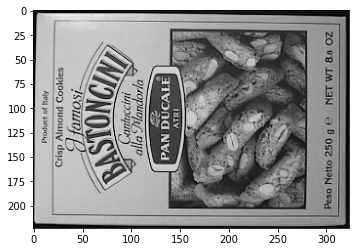

In [ ]:
box=np.array(Image.open('/box.png'), dtype=int)
figure()
imshow(box, cmap='gray', vmin=0, vmax=255)
show()

Масштабируем изображение в 2 и 4 раза

In [ ]:
def scale(I, s):
  w = I.shape[0]
  h = I.shape[1]

  newI = np.zeros((w//s, h//s), dtype=int)

  for i in range(0, w//s):
    for j in range(0, h//s):
      #print(int(np.mean(I[i*s:s*(i+1), j*s:s*(j+1)])))
      newI[i, j] = int(np.mean(I[i*s:s*(i+1), j*s:s*(j+1)]))

  return newI

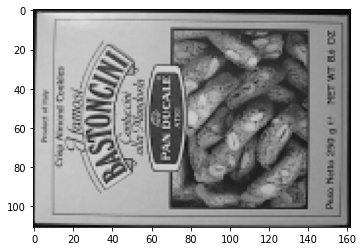

In [ ]:
box2 = scale(box, 2)
figure()
imshow(box2, cmap='gray', vmin=0, vmax=255)
show()

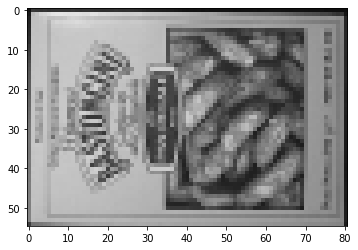

In [ ]:
box4 = scale(box2, 2)
figure()
imshow(box4, cmap='gray', vmin=0, vmax=255)
show()

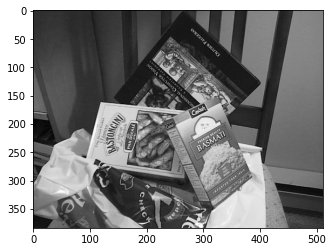

In [ ]:
scene=np.array(Image.open('/box_in_scene.png'), dtype=int)
figure()
imshow(scene, cmap='gray', vmin=0, vmax=255)
show()

# 1. Детектирование особых точек 

Детектирование особых точек на основе алгоритма FAST 

In [ ]:
patch_size=31

In [ ]:
def FAST(image, n, t):
  if n < 6 or n > 16:
    return

  w = image.shape[0]
  h = image.shape[1]

  features = []
  for i in range(patch_size//2, w-patch_size//2):
    for j in range(patch_size//2, h-patch_size//2):
      p = image[i, j]
      B1 = np.concatenate((image[i:i+2, j-3], image[i+2, j-2], image[i+3, j-1:j+2], image[i+2, j+2], image[i:i+2, j+3]), axis=None)
      B2 = np.concatenate((image[i+3, j:j+2], image[i+2, j+2], image[i-1:i+2, j+3], image[i-2, j+2], image[i-3, j:j+2]), axis=None)
      B =  np.concatenate((image[i-1:i+2, j-3], image[i+2, j-2], image[i+3, j-1:j+2], image[i+2, j+2], image[i-1:i+2, j+3], image[i-2, j+2], image[i-3, j-1:j+2], image[i-2, j-2]), axis=None)
      count = 0
      if (all(q > p+t for q in B1) or all(q > p+t for q in B2)):
        for q in np.concatenate((B, B), axis=None):
          if q > p+t:
            count += 1
          else:
            count = 0
          if count >= n:
            features.append((i, j))
            break
      elif (all(q < p-t for q in B1) or all(q < p-t for q in B2)):
        for q in np.concatenate((B, B), axis=None):
          if q < p-t:
            count += 1
          else:
            count = 0
          if count >= n:
            features.append((i, j))
            break
  return features

In [ ]:
F1 = FAST(box, 12, 40)
F12 = FAST(box2, 12, 40)
F14 = FAST(box4, 12, 40)
print(len(F1), F1)
print(len(F12), F12)
print(len(F14), F14)

841 [(22, 300), (22, 306), (23, 300), (23, 301), (23, 306), (24, 302), (25, 300), (25, 306), (29, 303), (32, 300), (33, 71), (34, 70), (34, 71), (34, 300), (34, 301), (35, 70), (35, 301), (35, 303), (35, 305), (36, 75), (36, 76), (36, 77), (37, 78), (38, 67), (38, 79), (38, 80), (38, 225), (39, 73), (39, 81), (39, 156), (40, 82), (40, 157), (41, 65), (41, 72), (41, 83), (41, 84), (42, 71), (42, 76), (42, 85), (42, 154), (42, 275), (42, 302), (42, 303), (42, 306), (43, 64), (43, 86), (43, 87), (43, 206), (43, 246), (43, 275), (43, 276), (43, 301), (44, 70), (44, 88), (44, 207), (44, 227), (44, 302), (44, 303), (45, 69), (45, 89), (45, 227), (46, 62), (46, 73), (46, 74), (46, 91), (46, 227), (47, 68), (47, 92), (47, 162), (48, 67), (48, 93), (48, 94), (49, 60), (49, 95), (50, 66), (50, 96), (50, 219), (50, 300), (51, 59), (51, 70), (51, 97), (51, 98), (52, 69), (52, 70), (52, 99), (52, 158), (53, 58), (53, 64), (53, 69), (53, 70), (53, 71), (53, 101), (53, 305), (54, 71), (54, 102), (55,

In [ ]:
F2 = FAST(scene, 12, 40)
print(len(F2), F2)

584 [(63, 239), (71, 228), (78, 251), (78, 258), (78, 326), (79, 237), (80, 257), (83, 240), (84, 261), (85, 262), (90, 250), (93, 240), (95, 240), (95, 274), (96, 229), (96, 275), (96, 276), (97, 230), (97, 239), (97, 276), (97, 277), (98, 275), (99, 231), (100, 236), (101, 235), (102, 245), (105, 262), (106, 251), (106, 290), (107, 251), (110, 241), (112, 242), (114, 245), (114, 264), (124, 279), (124, 301), (124, 310), (127, 304), (128, 401), (130, 308), (131, 309), (131, 310), (132, 285), (132, 300), (133, 286), (133, 287), (134, 317), (134, 318), (135, 303), (135, 304), (139, 290), (139, 298), (140, 249), (141, 310), (141, 319), (141, 320), (142, 309), (144, 288), (144, 289), (144, 290), (144, 296), (144, 297), (144, 304), (144, 322), (145, 297), (145, 298), (145, 305), (145, 323), (146, 314), (150, 312), (151, 312), (152, 300), (152, 320), (152, 321), (152, 322), (152, 323), (153, 320), (153, 321), (154, 301), (154, 337), (155, 306), (155, 313), (155, 333), (156, 314), (156, 332)

Полученные по алгоритму FAST точки фильтруем по критерию угловых точек Харриса. 

In [ ]:
def build_W(sigma2):
  const1 = 2*sigma2
  const2 = 2*np.pi*sigma2

  G = np.zeros((5, 5), dtype=np.float64)

  for i in range(5):
    for j in range(5):
      G[i, j] = np.power(np.e, -((i-3)**2 + (j-3)**2)/const1)/const2

  G /= np.sum(G)
  return G 

In [ ]:
W = build_W(100)
print(W)

[[0.03766047 0.03861385 0.03919742 0.0393939  0.03919742]
 [0.03861385 0.03959136 0.04018971 0.04039116 0.04018971]
 [0.03919742 0.04018971 0.0407971  0.04100159 0.0407971 ]
 [0.0393939  0.04039116 0.04100159 0.04120711 0.04100159]
 [0.03919742 0.04018971 0.0407971  0.04100159 0.0407971 ]]


In [ ]:
def get_gradient(image):
  width = image.shape[0]
  height = image.shape[1]

  imageCopy = np.zeros((width+1, height+1), dtype=int)

  for i in range(width):
    for j in range(height):
      imageCopy[i+1, j+1] = image[i, j]

  gradient = np.zeros((width+1, height+1, 2), dtype=float)

  for i in range(1, width):
    for j in range(1, height):
      gradient[i, j, 0] = (imageCopy[i+1, j]-imageCopy[i-1, j] + imageCopy[i+1, j-1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i-1, j+1])/6
      gradient[i, j, 1] = (imageCopy[i, j+1]-imageCopy[i, j-1] + imageCopy[i-1, j+1]-imageCopy[i-1, j-1] + imageCopy[i+1, j+1]-imageCopy[i+1, j-1])/6

  return gradient[1:width+1, 1:height+1, :]

In [ ]:
grad1 = get_gradient(box)
grad12 = get_gradient(box2)
grad14 = get_gradient(box4)

In [ ]:
grad2 = get_gradient(scene)

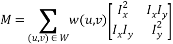

In [ ]:
def get_M(I, grad, u, v):
  w = I.shape[0]
  h = I.shape[1]

  Icopy = np.zeros((w+4, h+4), dtype=int)
  Icopy[2:w+2, 2:h+2] = I

  M = np.zeros((2, 2), dtype=float)
  for i in range(u-2, u+3):
    for j in range(v-2, v+3):
      Ix = grad[i, j, 0]
      Iy = grad[i, j, 1]
      A = np.array([[Ix**2, Ix*Iy], [Ix*Iy, Iy**2]], dtype=float)
      A.shape = (2, 2)
      new = np.sum(W * Icopy[i-2+2:i+3+2, j-2+2:j+3+2]) * A
      M = np.add(M, new)
  return M

In [ ]:
def get_M_for_all_points(image, grad, F):
  M = []
  for p in F:
    x, y = p
    m = get_M(image, grad, x, y)
    M.append(m)
  return M

In [ ]:
M1 = get_M_for_all_points(box, grad1, F1)
M12 = get_M_for_all_points(box, grad12, F12)
M14 = get_M_for_all_points(box, grad14, F14)

In [ ]:
M2 = get_M_for_all_points(scene, grad2, F2)

На основе значения критерия R = det(M) - k*(tr(M))^2 принять решение о фильтрации ключевой точки. Параметр k выбрать из интервала [0.04, 0.06]. 

In [ ]:
def get_R(m, k):
  r = np.linalg.det(m) - k * np.trace(m)**2
  return r

In [ ]:
def get_R_for_all_points(M, k):
  R = []
  for m in M:
    r = get_R(m, k)
    R.append(r)
  return R

In [ ]:
k = 0.04
R1 = get_R_for_all_points(M1, k)
R12 = get_R_for_all_points(M12, k)
R14 = get_R_for_all_points(M14, k)
print(R1)
print(R12)
print(R14)

[2809546213375.5786, 865100989188.5393, 5020724924224.743, 6339813070858.173, 1622136398016.9163, 4242066132445.5845, 4823405572216.782, 3185372646682.7856, 4021919089721.674, 5219566316563.054, 673610708216.3608, 847858080399.6704, 770186671590.094, 4405384977277.588, 7862294486791.405, 230100894013.00604, 4346099943121.7114, 3532191028181.767, 2100115408127.8276, 4705630706369.55, 5105803240473.722, 4419164596261.791, 1346147014324.1865, -109514203735.52744, 15422936519.641113, -274372000094.73975, 12722750579.54966, 57640158437.05591, -36438210016.0, 416207712433.7741, 229110800893.29468, 257976117721.0129, -89583143936.77292, -266719328419.63092, 54159042049.90845, 159233742208.3064, -128428489607.17969, 7020190204790.869, 464557780297.4988, 276509620531.41034, 430022001788.4283, 1897500857120.1777, 1780636013777.4058, 1101732730659.0283, -85240593073.17264, 244159561087.9961, 74542225263.2146, 425469905980.6409, 115361440438.55612, 564934947142.5679, 966957888635.6776, 24117006105

In [ ]:
R2 = get_R_for_all_points(M2, k)
print(R2)

[769700141693.8677, 381152792419.8086, 6619285340851.206, 354683863902.5206, 3636041718012.9414, 5198560352795.254, 864434367828.4609, 983249615460.4451, 2698388831037.001, 634639469045.8522, 1308254671944.6575, 990825767709.0717, 921264015767.7484, 807876791097.9478, 3457389046382.628, 3578263687396.7495, 4952239633896.936, 2807822760521.915, 2110745609952.6833, 6045259811740.257, 5611471242160.069, 3597017037693.442, 2405226475977.1587, 2959460281396.5835, 2109940313380.4697, 1719499568667.559, 5136651784972.316, 660009333723.3286, 214438493769.74335, 464134102100.0583, 829618410881.301, 1309027606263.521, 590027983266.9147, 2143444313021.599, 309549589060.4104, 566154551322.1086, 1811358426324.771, 598862728376.0417, 318889428008.64307, 1417237821094.7175, 1371835002469.2646, 376655096207.2744, 2689926556133.751, 5287330316099.254, 1224929709805.619, 1082288746774.2903, 1994501415479.5605, 1823569370457.302, 4077142437962.4053, 3448330271361.1143, 2057439192333.481, 1895368215000.32

Отфильтровать точки по убыванию значения критерия Харриса и выбрать первые N точек.

In [ ]:
def Harris_filtering(F, R, N):
  point_R = dict()
  for i in range(len(F)):
    point_R[F[i]] = R[i]
    
  d = dict(sorted(point_R.items(), key=lambda item: item[1], reverse=True)[0:N])
  m = N
  for key in reversed(list(d.keys())):
    if d[key] >= 0:
      break 
    m -= 1
  points = list(d.keys())[0:m]
  return points

In [ ]:
P1 = Harris_filtering(F1, R1, 400)
P12 = Harris_filtering(F12, R12, len(F12))
P14 = Harris_filtering(F14, R14, len(F14))
print(len(P1), P1)
print(len(F12), len(P12), P12)
print(len(F14), len(P14), P14)

400 [(93, 56), (53, 70), (93, 55), (92, 56), (101, 54), (117, 135), (53, 69), (117, 134), (80, 74), (81, 74), (143, 53), (93, 25), (92, 55), (92, 24), (106, 41), (132, 34), (111, 41), (103, 77), (117, 136), (111, 42), (95, 78), (52, 70), (82, 108), (53, 71), (96, 78), (164, 95), (70, 86), (83, 138), (83, 109), (52, 69), (80, 73), (144, 52), (81, 73), (104, 77), (96, 79), (95, 79), (158, 64), (72, 86), (135, 61), (142, 77), (70, 87), (127, 49), (134, 61), (152, 87), (116, 136), (108, 27), (61, 105), (90, 94), (131, 35), (146, 85), (101, 107), (158, 23), (118, 134), (142, 76), (143, 77), (119, 94), (131, 34), (90, 24), (176, 74), (145, 84), (118, 136), (89, 136), (153, 87), (64, 91), (71, 87), (177, 74), (97, 135), (130, 110), (93, 27), (103, 78), (127, 50), (80, 83), (125, 54), (142, 53), (91, 24), (124, 55), (111, 40), (100, 107), (82, 107), (143, 76), (46, 74), (94, 42), (82, 41), (135, 62), (63, 91), (124, 94), (140, 61), (159, 24), (63, 90), (140, 60), (152, 92), (105, 77), (83, 43)

In [ ]:
P2 = Harris_filtering(F2, R2, 400)
print(len(P2), P2)

400 [(231, 309), (230, 310), (241, 293), (242, 293), (244, 294), (240, 293), (259, 92), (240, 292), (259, 93), (176, 307), (270, 107), (231, 307), (368, 288), (181, 284), (181, 283), (232, 315), (229, 310), (325, 192), (231, 308), (325, 193), (271, 107), (363, 290), (258, 92), (324, 192), (252, 169), (228, 310), (194, 182), (202, 137), (258, 93), (242, 132), (193, 144), (241, 132), (201, 138), (192, 144), (324, 193), (179, 283), (225, 327), (236, 308), (360, 195), (242, 131), (193, 143), (235, 133), (168, 334), (195, 183), (200, 183), (207, 146), (197, 141), (248, 134), (212, 134), (266, 118), (193, 145), (360, 196), (192, 143), (167, 334), (177, 294), (359, 196), (266, 119), (200, 138), (190, 281), (168, 333), (187, 150), (196, 141), (251, 169), (238, 301), (186, 150), (212, 133), (243, 131), (177, 186), (276, 133), (197, 140), (276, 134), (213, 134), (186, 151), (367, 288), (201, 139), (167, 333), (186, 149), (187, 151), (362, 289), (236, 131), (270, 125), (194, 145), (270, 124), (21

In [ ]:
def draw_featurs(image, points):
  w = image.shape[0]
  h = image.shape[1]
  imageWithFeatures = np.zeros((w, h, 3), dtype=int)
  for i in range(w):
      for j in range(h):
          imageWithFeatures[i, j, :] = image[i, j]

  color = [0, 0, 255]
  for i, j in points:
    imageWithFeatures[i-1:i+2, j-3] = color
    imageWithFeatures[i+2, j-2] = color
    imageWithFeatures[i+3, j-1:j+2] = color
    imageWithFeatures[i+2, j+2] = color
    imageWithFeatures[i-1:i+2, j+3] = color
    imageWithFeatures[i-2, j+2] = color
    imageWithFeatures[i-3, j-1:j+2] = color
    imageWithFeatures[i-2, j-2] = color
  return imageWithFeatures

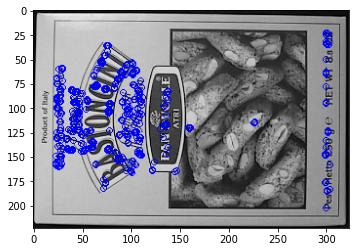

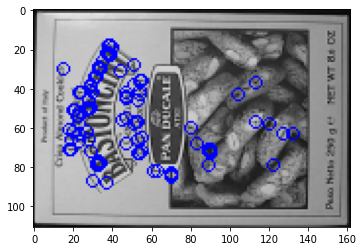

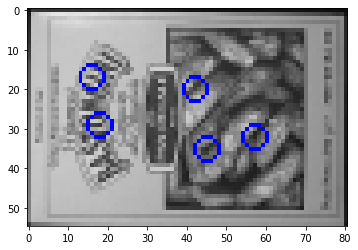

In [ ]:
boxWithFeatures = draw_featurs(box, P1)

figure()
imshow(boxWithFeatures, vmin=0, vmax=255)
show()

boxWithFeatures2 = draw_featurs(box2, P12)
boxWithFeatures4 = draw_featurs(box4, P14)

imshow(boxWithFeatures2, vmin=0, vmax=255)
show()
imshow(boxWithFeatures4, vmin=0, vmax=255)
show()

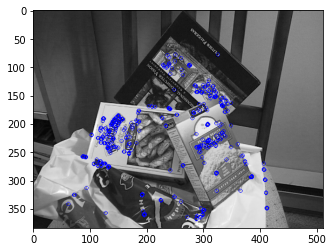

In [ ]:
sceneWithFeatures = draw_featurs(scene, P2)

figure()
imshow(sceneWithFeatures, vmin=0, vmax=255)
show()

# 2. Описание ключевых точек (построение дескриптора)

Для каждой оставшейся после фильтрации точки вычислить ориентацию на основе моментов изображения m01,m10:

angle = atan2(m01; m10).


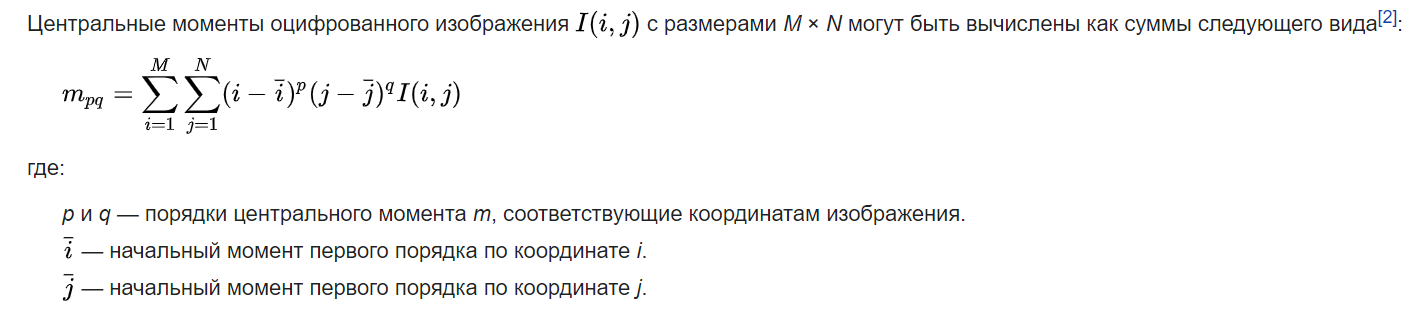

In [ ]:
def get_moment(I, p, q, x, y, r):
  w = I.shape[0]
  h = I.shape[1]

  ci = w//2
  cj = h//2

  m = 0
  for i in range(max(0, x-r), min(w, x+r+1)):
      for j in range(max(0, y-r), min(h, y+r+1)):
        m += (i-ci)**p * (j-cj)**q * I[i, j]
  return m

In [ ]:
import math

def get_angles(image, points, r):

  angles = []
  for x, y in points:
    m01 = get_moment(image, 0, 1, x, y, r)
    m10 = get_moment(image, 1, 0, x, y, r)
    a = math.atan2(m01, m10) % (2*np.pi)
    angles.append(a)

  return angles

In [ ]:
  patch_size = 31
  r = patch_size

In [ ]:
A1 = get_angles(box, P1, r)
A12 = get_angles(box2, P12, r)
A14 = get_angles(box4, P14, r)
print(A1)
print(A12)
print(A14)

[4.541156943477764, 4.143967815960006, 4.542777322109971, 4.532657085223168, 4.616549176535526, 4.899626388501431, 4.149289213702245, 4.893064073373852, 4.368794357943157, 4.3791703991031525, 5.0007404829525655, 4.57421423674087, 4.534277860604394, 4.567473961098502, 4.667677786816716, 4.879366015723805, 4.710897583543868, 4.612669287022355, 4.905947429837948, 4.711016099010644, 4.516291007273184, 4.1364427285549255, 4.214791888427114, 4.138771836878985, 4.52659500278192, 5.404189873981798, 4.2013587544387025, 3.8395763009002994, 4.224559847469811, 4.141785698239916, 4.372376752334607, 5.007096047703758, 4.3825967389614515, 4.623198531487191, 4.525108917541161, 4.51468769053248, 5.165204901220133, 4.221234088149961, 4.944645385804925, 5.0673287651678685, 4.195333435327672, 4.854883555037967, 4.9362233675557174, 5.228451531222107, 4.87140070239109, 4.688229529530273, 3.9690930309150554, 4.405733929985773, 4.873285623207115, 5.153441934503505, 4.537379190099228, 5.053101203627747, 4.9239

In [ ]:
A2 = get_angles(scene, P2, r)
print(A2)

[0.9456657267529774, 0.9656776154284664, 0.6661474901427992, 0.6560898122905885, 0.648601132939141, 0.676106769653758, 5.0953981050934996, 0.6626698781892147, 5.097088822098378, 1.8259955975432185, 5.174801327640967, 0.9320737417530057, 0.2020645016185753, 1.75217327208191, 1.7566054646193527, 0.9713487585186774, 0.9791367303091509, 5.863229040722776, 0.9389681966191289, 5.86947582652993, 5.179503786421853, 0.21754736090325497, 5.090506633474979, 5.85990879708736, 5.306504585634995, 0.9927719971880794, 4.727365383225968, 4.791420764303422, 5.092212836372704, 5.096903488265305, 4.7193380412312, 5.090413307698794, 4.782457405663327, 4.713761073625713, 5.866349137173665, 1.8201717591314899, 1.1140107789342644, 0.8759315612302144, 5.934890184462138, 5.0947705300327515, 4.7204670169915985, 5.052531388756633, 1.871958855712525, 4.735037559513263, 4.782100870633636, 4.829060234886717, 4.746710803948247, 5.139691435991423, 4.875356900507193, 5.178365533420013, 4.718255935249809, 5.939356747590

Перед построением дескриптора изображение необходимо сгладить с помощью фильтра Гаусса

In [ ]:
def build_G(sigma2_e):
  const1 = 2*sigma2_e
  const2 = 2*np.pi*sigma2_e

  G = np.zeros(9, dtype=np.float64)
  G.shape = (3, 3)

  for i in range(3):
    for j in range(3):
      G[i, j] = np.power(np.e, -((i-3//2)**2 + (j-3//2)**2)/const1)/const2

  G /= np.sum(G)
  return G

G = build_G(100)
print(G)

def Gaussian_filtering(image_e):
  width_e = image_e.shape[0]
  height_e = image_e.shape[1]

  gaussImage = np.zeros(width_e*height_e, dtype=int)
  gaussImage.shape = (width_e, height_e)

  image_eCopy = np.zeros((width_e+1)*(height_e+1), dtype=int)
  image_eCopy.shape = ((width_e+1),(height_e+1))


  for i in range(width_e):
      for j in range(height_e):
        image_eCopy[i+1, j+1] = image_e[i, j]

  for i in range(1, width_e-1):
      for j in range(1, height_e-1):
        gaussImage[i, j] = np.sum(G * image_eCopy[i-1:i+2, j-1:j+2])

  gaussImage = clip(gaussImage, 0, 255)     
  return gaussImage 

[[0.11074074 0.11129583 0.11074074]
 [0.11129583 0.1118537  0.11129583]
 [0.11074074 0.11129583 0.11074074]]


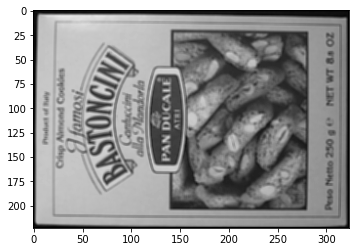

In [ ]:
gaussBox = Gaussian_filtering(box)
figure()
imshow(gaussBox, cmap='gray', vmin=0, vmax=255)

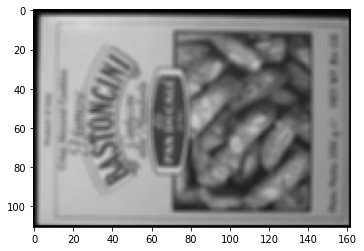

In [ ]:
gaussBox2 = Gaussian_filtering(box2)
figure()
imshow(gaussBox2, cmap='gray', vmin=0, vmax=255)

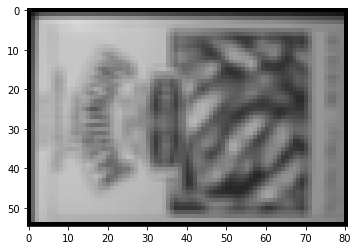

In [ ]:
gaussBox4 = Gaussian_filtering(box4)
figure()
imshow(gaussBox4, cmap='gray', vmin=0, vmax=255)

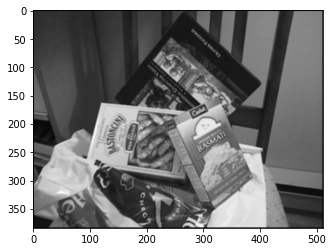

In [ ]:
gaussScene = Gaussian_filtering(scene)
figure()
imshow(gaussScene, cmap='gray', vmin=0, vmax=255)

BRIEF представляет из себя бинарный вектор, каждый элемент которого получается из сравнения
интенсивностей пикселей из области вокруг особой точки.

In [ ]:
theta = [2*k*np.pi/30 for k in range(30)]
print(len(theta), theta)

30 [0.0, 0.20943951023931953, 0.41887902047863906, 0.6283185307179586, 0.8377580409572781, 1.0471975511965976, 1.2566370614359172, 1.4660765716752369, 1.6755160819145563, 1.8849555921538759, 2.0943951023931953, 2.3038346126325147, 2.5132741228718345, 2.7227136331111543, 2.9321531433504737, 3.1415926535897927, 3.3510321638291125, 3.5604716740684323, 3.7699111843077517, 3.979350694547071, 4.1887902047863905, 4.39822971502571, 4.607669225265029, 4.817108735504349, 5.026548245743669, 5.235987755982989, 5.445427266222309, 5.654866776461628, 5.8643062867009474, 6.073745796940267]


In [ ]:
Rt = []
for t in theta:
  rt = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
  Rt.append(rt)

In [ ]:
n = 256 #длина дескриптора
S = (np.pi/5) * np.random.randn(n, 2, 2)

In [ ]:
S /= np.max(S)
S *= (patch_size//2 - 2)
print(S)

[[[-3.18594859  3.09361697]
  [-2.04143263  2.3737476 ]]

 [[ 0.91515143  2.47329423]
  [-1.50727111  0.8299929 ]]

 [[-3.23839624  6.44038237]
  [ 4.66872637 -2.66197649]]

 ...

 [[-3.87297616 -8.20699404]
  [ 2.19913732 -8.53767131]]

 [[ 1.49228924  2.84161283]
  [-8.01168584 -1.31447163]]

 [[-0.94781069  3.59997291]
  [ 2.08700095  5.135824  ]]]


In [ ]:
St = []
for rt in Rt:
  st = []
  for i in range(S.shape[0]):
    st.append(list(np.array([rt.dot(S[i, 0]), rt.dot(S[i, 1])], dtype=int)))
  St.append(st)

print(St)

[[[array([-3,  3]), array([-2,  2])], [array([0, 2]), array([-1,  0])], [array([-3,  6]), array([ 4, -2])], [array([ 0, -2]), array([4, 5])], [array([10, -6]), array([-8,  2])], [array([3, 6]), array([-1, -1])], [array([-6,  3]), array([12, -1])], [array([-2,  0]), array([-6,  6])], [array([-4,  2]), array([8, 6])], [array([-3, -9]), array([-3,  2])], [array([-2,  4]), array([-3, -9])], [array([-3,  5]), array([ 1, -4])], [array([-1, -2]), array([ 6, -2])], [array([-1, -4]), array([ 0, 11])], [array([1, 5]), array([-4, -2])], [array([-3, -2]), array([3, 0])], [array([-1, -4]), array([ 2, -6])], [array([0, 5]), array([-5, 12])], [array([4, 0]), array([-7, -5])], [array([2, 2]), array([-6, -1])], [array([-1,  1]), array([3, 0])], [array([-4,  4]), array([-4,  1])], [array([ 4, -4]), array([1, 0])], [array([ 2, -1]), array([-3, -2])], [array([0, 0]), array([4, 1])], [array([-3,  2]), array([-6,  2])], [array([-2,  1]), array([0, 1])], [array([6, 0]), array([ 5, -6])], [array([-6, -1]), ar

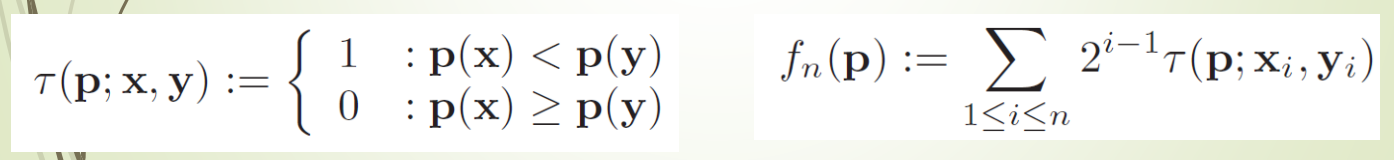

In [ ]:
def get_descriptor(gaussImage, points, angles, patch_size):
  w = gaussImage.shape[0]
  h = gaussImage.shape[1]

  def tau(p, x, y):
    if p[x[0], x[1]] < p[y[0], y[1]]:
      return 1
    return 0

  descriptor = []
  for j in range(len(points)):
    c = points[j]
    #print("center: ", c[0], c[1])

    t = len(theta)-1
    for i in range(len(theta)):
      if angles[j] < theta[i]:
        t = i-1
        break
    s = [[St[t][i][0] + c, St[t][i][1] + c] for i in range(n)]

    f = []

    for i in range(n-1, -1, -1):
      f.append(tau(gaussImage, s[i][0], s[i][1]))
    descriptor.append(np.array(f))
  
  return descriptor

In [ ]:
D1 = get_descriptor(gaussBox, P1, A1, patch_size)
print(len(D1))
# for key in D1.keys():
#   print(key, ":", D1[key])

200


In [ ]:
D12 = get_descriptor(gaussBox2, P12, A12, patch_size)
D13 = get_descriptor(gaussBox3, P13, A13, patch_size)
D14 = get_descriptor(gaussBox4, P14, A14, patch_size)

In [ ]:
D2 = get_descriptor(gaussScene, P2, A2, patch_size)
print(len(D2))

200


# Локализация объекта по ключевым точкам

**Для box:**

P1 - ключевые точки;
D1 - десткрипторы;
A1 - углы;

**Для scene:**

P2 - ключевые точки;
D2 - десткрипторы;
A2 - углы;


Для сопоставления дескрипторов используется расстояние Хэмминга

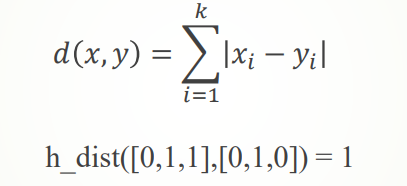

In [ ]:
def compare_descriptors(D1, D2):
  w = len(D1)
  h = len(D2)
  h_dist = np.zeros((w, h), dtype=int)

  for i in range(w):
    for j in range(h):
      v1 = D1[i]
      v2 = D2[j]
      d = sum(np.absolute(v1-v2))
      h_dist[i, j] = d

  return h_dist

In [ ]:
h_dist_1_2 = compare_descriptors(D1, D2)
print(h_dist_1_2)

[[137 126 143 ... 115 137 132]
 [155 138 129 ... 111 125 118]
 [159 138 135 ... 127 127 118]
 ...
 [123 108 107 ... 141 133 136]
 [112 121 126 ... 108 144 143]
 [135 132 129 ...  99 163 136]]


In [ ]:
h_dist_12_2 = compare_descriptors(D12, D2)
print(h_dist_12_2)

[[141 130 139 ...  89 133 132]
 [146 127 136 ...  88 128 135]
 [179 154 143 ... 111 133 106]
 ...
 [111 118 139 ...  73 135 116]
 [128 123 144 ... 128 116 125]
 [147 134 137 ...  99 119 140]]


In [ ]:
h_dist_13_2 = compare_descriptors(D13, D2)
print(h_dist_13_2)

[[135 124 137 ...  83 109 148]
 [153 142 139 ... 105 131 132]
 [140 123 132 ... 104 146 151]
 ...
 [158 147 126 ... 110 118 123]
 [117 104 143 ...  79  99 158]
 [108 123 144 ...  80 118 129]]


In [ ]:
h_dist_14_2 = compare_descriptors(D14, D2)
print(h_dist_14_2)

[[143 126 115 107 103 108 117 104 121 133 145 105 103 136 153 141 102 115
  132 127 131 137 130 122 129 107 111 134 132 127 130 122 138 139 148 139
  128 125 118 123 131 131 144 118 144 109 115 134 138 148 134 127 129 139
  134 143 146 132 146 142 122 133 110 128 143 144 128 140 142 118 141 128
  152 105 133 137 128 133 151 105 131 127 127 146 150 143 110 132 141 131
  146 100 135 146 131 149 145 121 112 148 158 144 105 115 114 114 152 120
  124 114 121 115 140 134 150 127 149 104 140 126 138 122 131 132 115 143
  136 108 164 112 149 132 127 118 151 134 142 119 126 110 137 146 129 129
  127 144 103 104 108 151 107 112 140 138 123 108 151 107 169 129 130 117
  100 124 127 111 165 105 118 141 153 139 136 108 142 124 132 134 122 144
  114 114 110 112 133 127 121 121  95 105 125 112 120 130 135 128 126 131
  127  86]
 [140 143 136 132 142 133 140 137 150  66  54 146  88 127 128 140 137 146
  143 136  64 128 145 141  98 134  58  79 157  96  67 103  67  58 137 124
  139 150 145 108  60  90 1

Использовать тест Lowe и Cross Check для определения лучших матчей.

In [ ]:
def Lowe_test(points1, points2, h_dist):
  R_Lowe = 0.8
  w = h_dist.shape[0]
  h = h_dist.shape[1]

  Lowe_dist1 = []
  Lowe_dist2 = []

  for i in range(w):
    dist1, dist2 = sorted(h_dist[i])[0:2]
    R = dist1/dist2 
    if R < R_Lowe:
      j = list(h_dist[i]).index(dist1)
      Lowe_dist1.append([points1[i], points2[j], dist1])

  for i in range(h):
    dist1, dist2 = sorted(h_dist[:, i])[0:2]
    R = dist1/dist2 
    if R < R_Lowe:
      j = list(h_dist[:, i]).index(dist1)
      Lowe_dist2.append([points1[j], points2[i], dist1])

  return [Lowe_dist1, Lowe_dist2]

In [ ]:
L_dist_1_2 = Lowe_test(P1, P2, h_dist_1_2)
print(len(L_dist_1_2[0]), len(L_dist_1_2[1]))
print(L_dist_1_2)

1 0
[[[(124, 54), (218, 131), 66]], []]


In [ ]:
L_dist_12_2 = Lowe_test(P12, P2, h_dist_12_2)
print(len(L_dist_12_2[0]), len(L_dist_12_2[1]))
print(L_dist_12_2)

2 15
[[[(62, 27), (224, 130), 48], [(79, 89), (165, 293), 66]], [[(72, 29), (368, 288), 56], [(63, 132), (168, 334), 53], [(63, 132), (167, 334), 52], [(72, 29), (367, 288), 56], [(63, 132), (167, 333), 46], [(28, 51), (192, 157), 75], [(57, 113), (352, 302), 63], [(62, 27), (224, 130), 48], [(63, 132), (169, 334), 65], [(28, 51), (191, 156), 71], [(79, 122), (234, 318), 60], [(60, 80), (361, 196), 76], [(43, 104), (274, 120), 72], [(63, 127), (142, 309), 61], [(79, 122), (237, 315), 58]]]


In [ ]:
L_dist_13_2 = Lowe_test(P13, P2, h_dist_13_2)
print(len(L_dist_13_2[0]), len(L_dist_13_2[1]))
print(L_dist_13_2)

0 24
[[], [[(53, 32), (258, 92), 57], [(53, 32), (258, 93), 55], [(57, 24), (242, 131), 62], [(20, 35), (266, 118), 71], [(42, 88), (167, 334), 71], [(20, 35), (266, 119), 69], [(20, 35), (190, 281), 77], [(42, 88), (168, 333), 70], [(15, 26), (186, 151), 67], [(42, 88), (167, 333), 61], [(15, 26), (185, 150), 53], [(39, 79), (360, 197), 92], [(20, 35), (192, 157), 79], [(20, 35), (191, 157), 70], [(20, 35), (192, 158), 81], [(48, 21), (246, 173), 57], [(42, 88), (235, 170), 74], [(20, 35), (191, 156), 75], [(53, 32), (169, 335), 67], [(53, 32), (173, 240), 65], [(39, 79), (365, 295), 84], [(53, 32), (173, 241), 73], [(53, 32), (172, 239), 59], [(20, 35), (277, 132), 72]]]


In [ ]:
L_dist_14_2 = Lowe_test(P14, P2, h_dist_14_2)
print(len(L_dist_14_2[0]), len(L_dist_14_2[1]))
print(L_dist_14_2)

0 70
[[], [[(29, 18), (259, 93), 83], [(17, 16), (176, 307), 66], [(17, 16), (270, 107), 54], [(20, 42), (231, 307), 105], [(32, 57), (181, 284), 92], [(17, 16), (271, 107), 64], [(17, 16), (194, 182), 58], [(17, 16), (202, 137), 79], [(17, 16), (242, 132), 96], [(17, 16), (193, 144), 67], [(17, 16), (201, 138), 67], [(17, 16), (192, 144), 58], [(17, 16), (193, 143), 60], [(32, 57), (168, 334), 84], [(17, 16), (195, 183), 69], [(17, 16), (197, 141), 78], [(17, 16), (248, 134), 91], [(17, 16), (212, 134), 81], [(17, 16), (193, 145), 67], [(17, 16), (192, 143), 64], [(32, 57), (167, 334), 77], [(32, 57), (359, 196), 101], [(17, 16), (200, 138), 75], [(32, 57), (168, 333), 86], [(17, 16), (187, 150), 85], [(17, 16), (196, 141), 64], [(17, 16), (186, 150), 86], [(17, 16), (212, 133), 93], [(17, 16), (243, 131), 101], [(17, 16), (177, 186), 85], [(17, 16), (197, 140), 73], [(17, 16), (213, 134), 67], [(17, 16), (186, 151), 89], [(17, 16), (201, 139), 70], [(17, 16), (186, 149), 79], [(17, 1

**Cross check**

Остаются только те точки, которые являются друг для друга самыми близкими по расстоянию между
дескрипторами.

In [ ]:
def cross_check(L_dist):
  points1 = []
  points2 = []
  for i in range(len(L_dist[0])):
    p1, p2, d = L_dist[0][i]
    for j in range(len(L_dist[1])):
      p12, p22, d2 = L_dist[1][j]
      if p1 == p12 and p2 == p22:
        points1.append(p1)
        points2.append(p2)
  return [points1, points2]

In [ ]:
cc_dist = cross_check(L_dist_12_2)
print(cc_dist)

[[(62, 27)], [(224, 130)]]


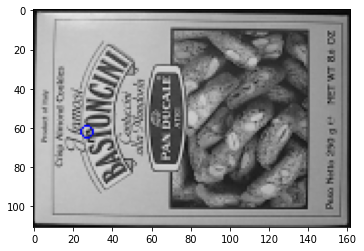

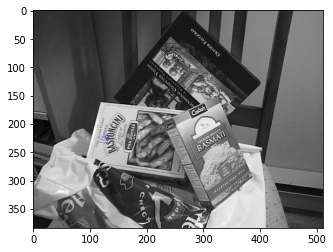

In [ ]:
res1 = draw_featurs(box2, cc_dist[0])
res2 = draw_featurs(scene, cc_dist[1])
figure()
imshow(res1, vmin=0, vmax=255)
figure()
imshow(res2, vmin=0, vmax=255)